### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig
from matplotlib.lines import Line2D
import plotly.graph_objects as go
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import altair as alt
%matplotlib inline
sns.set(color_codes=True)

### Load Dataset

In [3]:
kor_5 = pd.read_excel('tm_koridor_5.xlsx')

In [4]:
kor_5

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
0,614.45,1800,42.3,13.2445,0.292671,76.345103,24.32,10,3,111
1,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,114
2,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,117
3,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,117
4,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,116
...,...,...,...,...,...,...,...,...,...,...
4325,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,1,104
4326,526.05,2100,43.0,18.1640,1.296945,7.982779,26.83,10,1,128
4327,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,1,104
4328,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,1,108


In [5]:
kor_5.shape

(4330, 10)

In [6]:
kor_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4330 entries, 0 to 4329
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LTE Serving Cell Distance (m)              4330 non-null   float64
 1   Frequency (MHz)                            4330 non-null   int64  
 2   Total_Heigh_of_TX (m)                      4321 non-null   float64
 3   Total_Heigh_of_RX (m)                      4330 non-null   float64
 4   Sudut Vertical RX from Mainbeam TX (α)     4321 non-null   float64
 5   Sudut Horizontral RX from Mainbeam TX (β)  4321 non-null   float64
 6   Lebar Jalan (m)                            4330 non-null   float64
 7   Tinggi Gedung Sekitar (m)                  4330 non-null   int64  
 8   Jarak Antar Gedung (m)                     4330 non-null   int64  
 9   PUCCH Path Loss_All Logs                   4330 non-null   int64  
dtypes: float64(6), int64(4)


In [7]:
integer = ['Tinggi Gedung Sekitar (m)', 'Jarak Antar Gedung (m)', 'PUCCH Path Loss_All Logs']
float_ = ['LTE Serving Cell Distance (m)', 'Total_Heigh_of_TX (m)', 'Total_Heigh_of_RX (m)', 'Sudut Vertical RX from Mainbeam TX (α)','Sudut Horizontral RX from Mainbeam TX (β)','Lebar Jalan (m)']

In [8]:
kor_5[integer].describe()

,Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
count,4330.000000,4330.000000,4330.000000
mean,6.787529,1.205774,119.471363
std,3.676529,0.663481,17.373899
min,0.000000,0.000000,81.000000
25%,5.000000,1.000000,104.000000
50%,5.000000,1.000000,120.000000
75%,10.000000,2.000000,134.000000
max,15.000000,3.000000,162.000000


In [9]:
kor_5[float_].describe()

,LTE Serving Cell Distance (m),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m)
count,4330.000000,4321.000000,4330.000000,4321.000000,4321.000000,4330.000000
mean,594.960478,45.228975,14.896173,2.900819,34.510114,25.930515
std,431.212798,9.815540,5.230388,3.237048,33.027241,12.578953
min,23.740000,25.000000,3.997500,0.000207,0.016843,15.210000
25%,311.142500,39.000000,11.087000,1.120114,11.565051,18.380000
50%,479.385000,43.000000,14.850500,2.145887,26.408932,22.230000
75%,742.555000,55.000000,18.293000,3.539524,47.504257,26.090000
max,2677.090000,63.500000,30.033000,34.382571,179.992081,58.170000


In [10]:
kor_5.groupby("Frequency (MHz)").size()

Frequency (MHz)
1800    2441
2100    1889
dtype: int64

### Checking and Removing Null Values

In [11]:
print(kor_5.isnull().sum())

LTE Serving Cell Distance (m)                0
Frequency (MHz)                              0
Total_Heigh_of_TX (m)                        9
Total_Heigh_of_RX (m)                        0
Sudut Vertical RX from Mainbeam TX (α)       9
Sudut Horizontral RX from Mainbeam TX (β)    9
Lebar Jalan (m)                              0
Tinggi Gedung Sekitar (m)                    0
Jarak Antar Gedung (m)                       0
PUCCH Path Loss_All Logs                     0
dtype: int64


In [12]:
located_null = pd.isnull(kor_5["Total_Heigh_of_TX (m)"])
kor_5[located_null]

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
4288,334.59,1800,NaN,14.884,NaN,NaN,26.83,10,1,104
4289,327.56,1800,NaN,15.803,NaN,NaN,26.83,10,1,106
4290,320.50,1800,NaN,15.803,NaN,NaN,26.83,10,1,106
4292,314.72,1800,NaN,15.803,NaN,NaN,26.83,10,1,103
4293,308.50,1800,NaN,16.653,NaN,NaN,26.83,10,1,105
4296,297.12,1800,NaN,16.653,NaN,NaN,26.83,10,1,109
4298,291.75,1800,NaN,17.386,NaN,NaN,26.83,10,1,109
4300,286.67,1800,NaN,17.386,NaN,NaN,26.83,10,1,111
4301,282.17,1800,NaN,17.386,NaN,NaN,26.83,10,1,113


In [13]:
kor_5[4285:4305]

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
4285,706.56,2100,43.0,15.803,1.795652,22.681946,26.83,10,1,145
4286,711.89,2100,43.0,15.803,1.812140,22.846561,26.83,10,1,144
4287,716.39,2100,43.0,15.803,1.825870,23.011469,26.83,10,1,142
4288,334.59,1800,NaN,14.884,NaN,NaN,26.83,10,1,104
4289,327.56,1800,NaN,15.803,NaN,NaN,26.83,10,1,106
4290,320.50,1800,NaN,15.803,NaN,NaN,26.83,10,1,106
4291,687.92,2100,43.0,15.803,1.735984,23.425005,26.83,10,1,142
4292,314.72,1800,NaN,15.803,NaN,NaN,26.83,10,1,103
4293,308.50,1800,NaN,16.653,NaN,NaN,26.83,10,1,105
4294,667.30,2100,43.0,16.653,1.738966,19.502659,26.83,10,1,141


In [14]:
kor_5 = kor_5.dropna()

In [15]:
kor_5 = kor_5.reset_index(drop=True)
kor_5

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
0,614.45,1800,42.3,13.2445,0.292671,76.345103,24.32,10,3,111
1,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,114
2,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,117
3,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,117
4,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,116
...,...,...,...,...,...,...,...,...,...,...
4316,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,1,104
4317,526.05,2100,43.0,18.1640,1.296945,7.982779,26.83,10,1,128
4318,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,1,104
4319,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,1,108


### Checking and Removing Duplicate Data

In [16]:
duplicate_rows_df = kor_5[kor_5.duplicated()]
print("Banyaknya jumlah baris yang terduplikat :", duplicate_rows_df.shape)

Banyaknya jumlah baris yang terduplikat : (350, 10)


In [17]:
kor_5 = kor_5.drop_duplicates()

In [18]:
kor_5 = kor_5.reset_index(drop=True)
kor_5

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
0,614.45,1800,42.3,13.2445,0.292671,76.345103,24.32,10,3,111
1,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,114
2,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,117
3,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,116
4,507.26,1800,42.3,13.2445,0.278280,76.345103,24.32,10,3,120
...,...,...,...,...,...,...,...,...,...,...
3966,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,1,104
3967,526.05,2100,43.0,18.1640,1.296945,7.982779,26.83,10,1,128
3968,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,1,104
3969,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,1,108


In [19]:
duplicate_rows_df = kor_5[kor_5.duplicated()]
print("Banyaknya jumlah baris yang terduplikat :", duplicate_rows_df.shape)

Banyaknya jumlah baris yang terduplikat : (0, 10)


In [20]:
kor_5.groupby("Jarak Antar Gedung (m)").size()

Jarak Antar Gedung (m)
0     445
1    2573
2     813
3     140
dtype: int64

### Univariate Analysis

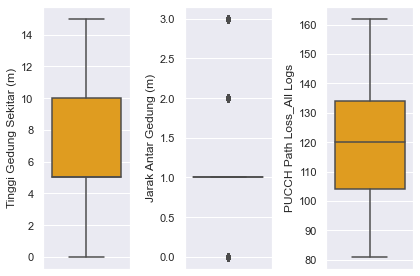

In [21]:
for i in range(0, len(integer)):
    plt.subplot(1, len(integer), i+1)
    sns.boxplot(y=kor_5[integer[i]], color='orange', orient='v')
    plt.tight_layout()

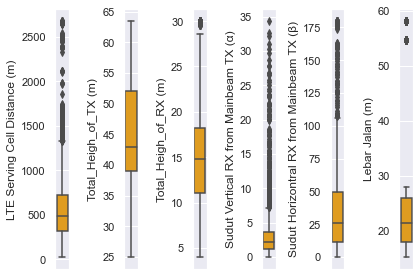

In [22]:
for i in range(0, len(float_)):
    plt.subplot(1, len(float_), i+1)
    sns.boxplot(y=kor_5[float_[i]], color='orange', orient='v')
    plt.tight_layout()

<ipython-input-23-14eb53b731cc>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(integer)/1, i+1)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-23-14eb53b731cc>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(integer)/1, i+1)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

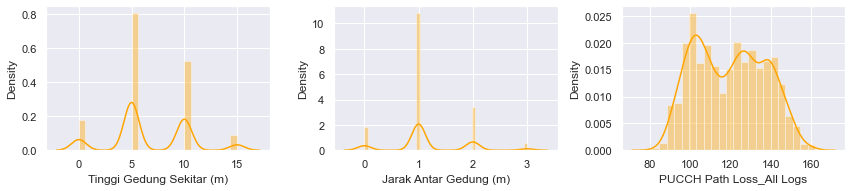

In [23]:
plt.figure(figsize=(12, 5))
for i in range(0, len(integer)):
    plt.subplot(2, len(integer)/1, i+1)
    sns.distplot(kor_5[integer[i]], color='orange')
    plt.tight_layout()

<ipython-input-24-9b883a63b335>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(float_)/2, i+1)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-24-9b883a63b335>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(float_)/2, i+1)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt yo

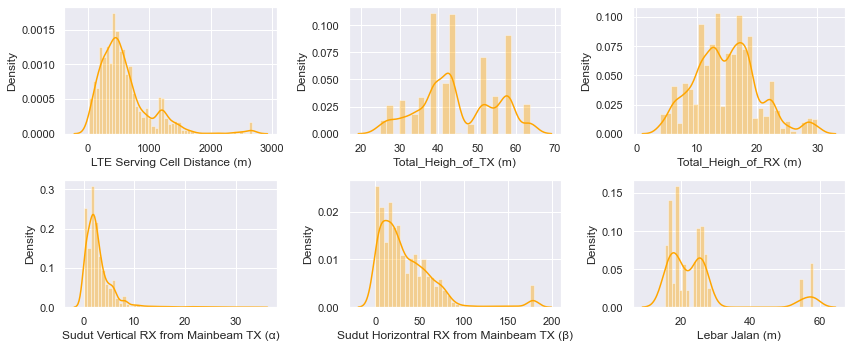

In [24]:
plt.figure(figsize=(12, 5))
for i in range(0, len(float_)):
    plt.subplot(2, len(float_)/2, i+1)
    sns.distplot(kor_5[float_[i]], color='orange')
    plt.tight_layout()

### Removing Outliers

In [25]:
# Detect outliers 
Q1 = kor_5.quantile(0.25)
Q3 = kor_5.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LTE Serving Cell Distance (m)                407.665000
Frequency (MHz)                              300.000000
Total_Heigh_of_TX (m)                         13.000000
Total_Heigh_of_RX (m)                          7.129000
Sudut Vertical RX from Mainbeam TX (α)         2.399666
Sudut Horizontral RX from Mainbeam TX (β)     38.171348
Lebar Jalan (m)                                8.110000
Tinggi Gedung Sekitar (m)                      5.000000
Jarak Antar Gedung (m)                         0.000000
PUCCH Path Loss_All Logs                      30.000000
dtype: float64


In [26]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower limit :\n", lower_limit)
print("---------------------")
print("Upper limit :\n", upper_limit)

Lower limit :
 LTE Serving Cell Distance (m)                -300.032500
Frequency (MHz)                              1350.000000
Total_Heigh_of_TX (m)                          19.500000
Total_Heigh_of_RX (m)                           0.361000
Sudut Vertical RX from Mainbeam TX (α)         -2.380119
Sudut Horizontral RX from Mainbeam TX (β)     -45.837770
Lebar Jalan (m)                                 5.695000
Tinggi Gedung Sekitar (m)                      -2.500000
Jarak Antar Gedung (m)                          1.000000
PUCCH Path Loss_All Logs                       59.000000
dtype: float64
---------------------
Upper limit :
 LTE Serving Cell Distance (m)                1330.627500
Frequency (MHz)                              2550.000000
Total_Heigh_of_TX (m)                          71.500000
Total_Heigh_of_RX (m)                          28.877000
Sudut Vertical RX from Mainbeam TX (α)          7.218546
Sudut Horizontral RX from Mainbeam TX (β)     106.847621
Lebar Jalan (m)      

In [27]:
# Menhilangkan data yang mengandung outliers
kor_5_no_outliers = kor_5[~((kor_5 < lower_limit) |(kor_5 > upper_limit)).any(axis=1)]
kor_5_no_outliers

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
140,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,1,99
141,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,1,102
142,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,1,101
143,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,1,101
144,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,1,100
...,...,...,...,...,...,...,...,...,...,...
3966,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,1,104
3967,526.05,2100,43.0,18.1640,1.296945,7.982779,26.83,10,1,128
3968,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,1,104
3969,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,1,108


In [28]:
kor_5_no_outliers = kor_5_no_outliers.reset_index(drop=True)
kor_5_no_outliers

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),Jarak Antar Gedung (m),PUCCH Path Loss_All Logs
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,1,99
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,1,102
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,1,101
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,1,101
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,1,100
...,...,...,...,...,...,...,...,...,...,...
1804,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,1,104
1805,526.05,2100,43.0,18.1640,1.296945,7.982779,26.83,10,1,128
1806,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,1,104
1807,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,1,108


In [29]:
kor_5_no_outliers.groupby("Frequency (MHz)").size()

Frequency (MHz)
1800    1056
2100     753
dtype: int64

In [30]:
kor_5_no_outliers.groupby("Tinggi Gedung Sekitar (m)").size()

Tinggi Gedung Sekitar (m)
5     1055
10     578
15     176
dtype: int64

In [31]:
kor_5_no_outliers.groupby("Jarak Antar Gedung (m)").size()

Jarak Antar Gedung (m)
1    1809
dtype: int64

### Bivariate Analysis

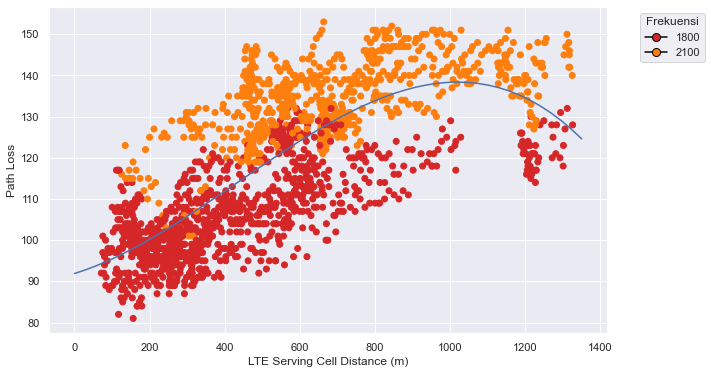

In [32]:
# Path Loss terhadap Jarak Tx ke Rx

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['LTE Serving Cell Distance (m)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(0, 1350)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("LTE Serving Cell Distance (m)")
plt.ylabel("Path Loss")
plt.show()

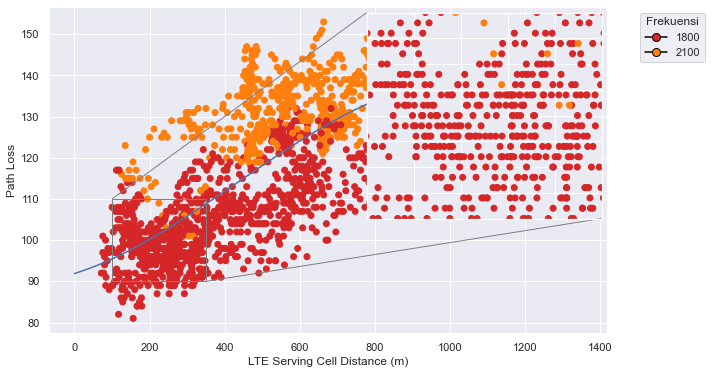

In [33]:
# Path Loss terhadap Jarak Tx ke Rx

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['LTE Serving Cell Distance (m)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(0, 1350)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("LTE Serving Cell Distance (m)")
plt.ylabel("Path Loss")

#Zoom
x1 = 100
x2 = 350
y1 = 90
y2 = 110
axins = zoomed_inset_axes(ax, 2.5, loc='upper right')
axins.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='0.5')
plt.draw()
plt.show()

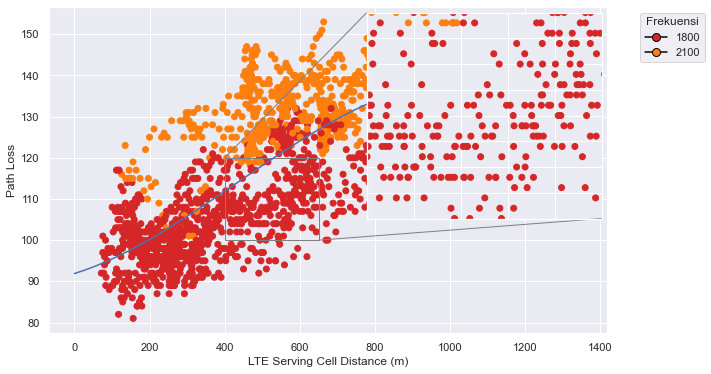

In [34]:
# Path Loss terhadap Jarak Tx ke Rx

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['LTE Serving Cell Distance (m)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(0, 1350)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("LTE Serving Cell Distance (m)")
plt.ylabel("Path Loss")

#Zoom
x1 = 400
x2 = 650
y1 = 100
y2 = 120
axins = zoomed_inset_axes(ax, 2.5, loc='upper right')
axins.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='0.5')
plt.draw()
plt.show()

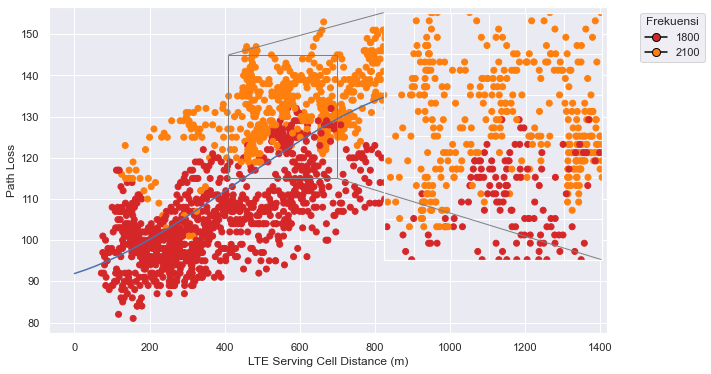

In [35]:
# Path Loss terhadap Jarak Tx ke Rx

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['LTE Serving Cell Distance (m)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(0, 1350)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("LTE Serving Cell Distance (m)")
plt.ylabel("Path Loss")

#Zoom
x1 = 410
x2 = 700
y1 = 115
y2 = 145
axins = zoomed_inset_axes(ax, 2, loc='upper right')
axins.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='0.5')
plt.draw()
plt.show()

In [65]:
kor_5_no_outliers['Frequency (MHz)'].unique()

array([1800, 2100], dtype=int64)

In [70]:
scale = alt.Scale(domain=[1800, 2100], range=['red', 'orange'])
color = alt.Color('Frequency (MHz):N', scale=scale)

In [71]:
# We create two selections
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])
# 1. Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('LTE Serving Cell Distance (m):T', title='LTE Serving Cell Distance (m)'),
    alt.Y('PUCCH Path Loss_All Logs:Q',
        title='Path Loss'),
    color=alt.condition(brush, color, alt.value('lightgray'))).properties(width=550,height=300).add_selection(brush).transform_filter(click)


##########################
# 2. Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='Frequency (MHz):N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

##########################
#3. Build Compound Plot
alt.vconcat(
    points,
    bars,
    data=kor_5_no_outliers,
    title="Path Loss terhadap Jarak Antena Pemancar (Tx) ke Penerima (Rx)"
)

alt.VConcatChart(...)

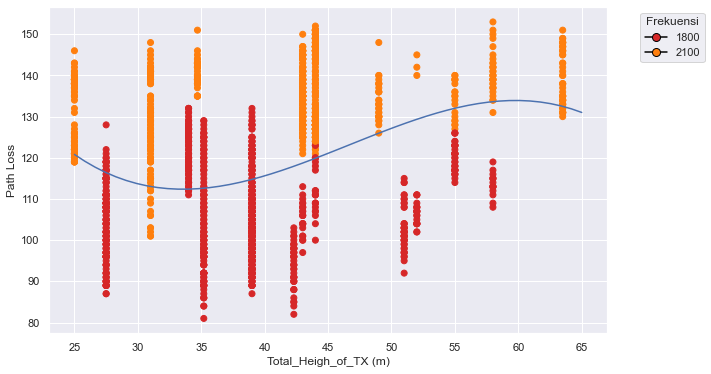

In [32]:
# Path Loss terhadap tinggi Tx (Antena Pemancar)

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['Total_Heigh_of_TX (m)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(25, 65)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Total_Heigh_of_TX (m)")
plt.ylabel("Path Loss")
plt.show()

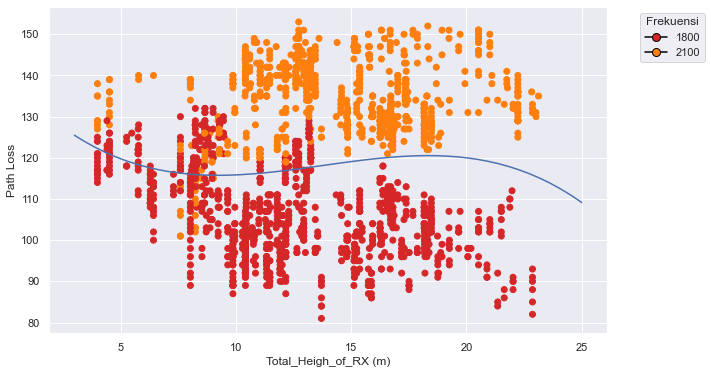

In [33]:
# Path Loss terhadap tinggi Rx (Penerima)

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['Total_Heigh_of_RX (m)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(3, 25)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Total_Heigh_of_RX (m)")
plt.ylabel("Path Loss")
plt.show()

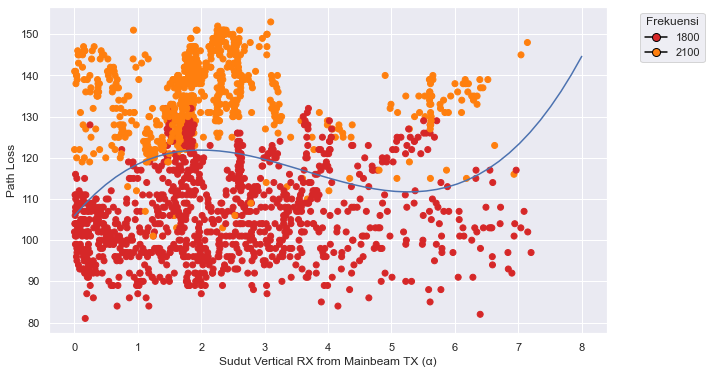

In [34]:
# Path Loss terhadap Sudut Vertical RX from Mainbeam TX (α)

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['Sudut Vertical RX from Mainbeam TX (α)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(0, 8)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Sudut Vertical RX from Mainbeam TX (α)")
plt.ylabel("Path Loss")
plt.show()

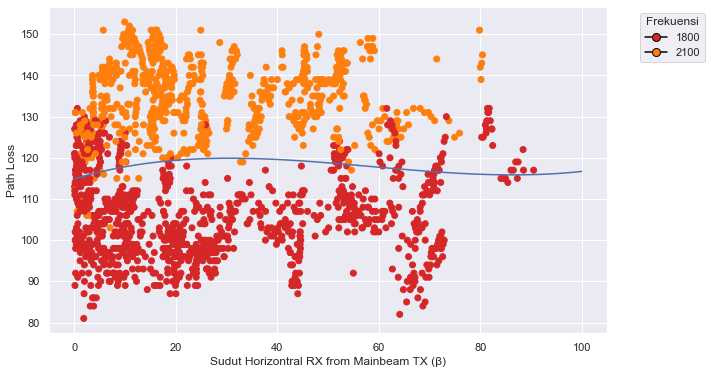

In [35]:
# Path loss terhadap Sudut Horizontral RX from Mainbeam TX (β)

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['Sudut Horizontral RX from Mainbeam TX (β)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(0, 100)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Sudut Horizontral RX from Mainbeam TX (β)")
plt.ylabel("Path Loss")
plt.show()

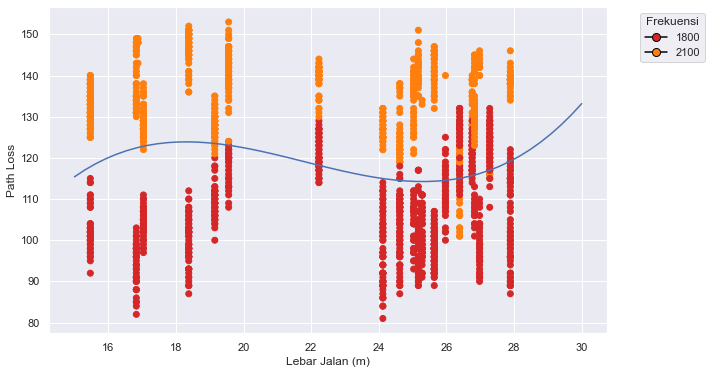

In [36]:
# Path loss terhadap Lebar Jalan (m)

fig, ax = plt.subplots(figsize=(10,6))
x=kor_5_no_outliers['Lebar Jalan (m)'] 
y=kor_5_no_outliers['PUCCH Path Loss_All Logs']
colors = {1800:'tab:red', 2100:'tab:orange'}
ax.scatter(x, y , c=kor_5_no_outliers['Frequency (MHz)'].map(colors))
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(15, 30)
plt.plot(myline, mymodel(myline))
handles = [Line2D([0], [0], marker='o', color='black', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Frekuensi', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Lebar Jalan (m)")
plt.ylabel("Path Loss")
plt.show()

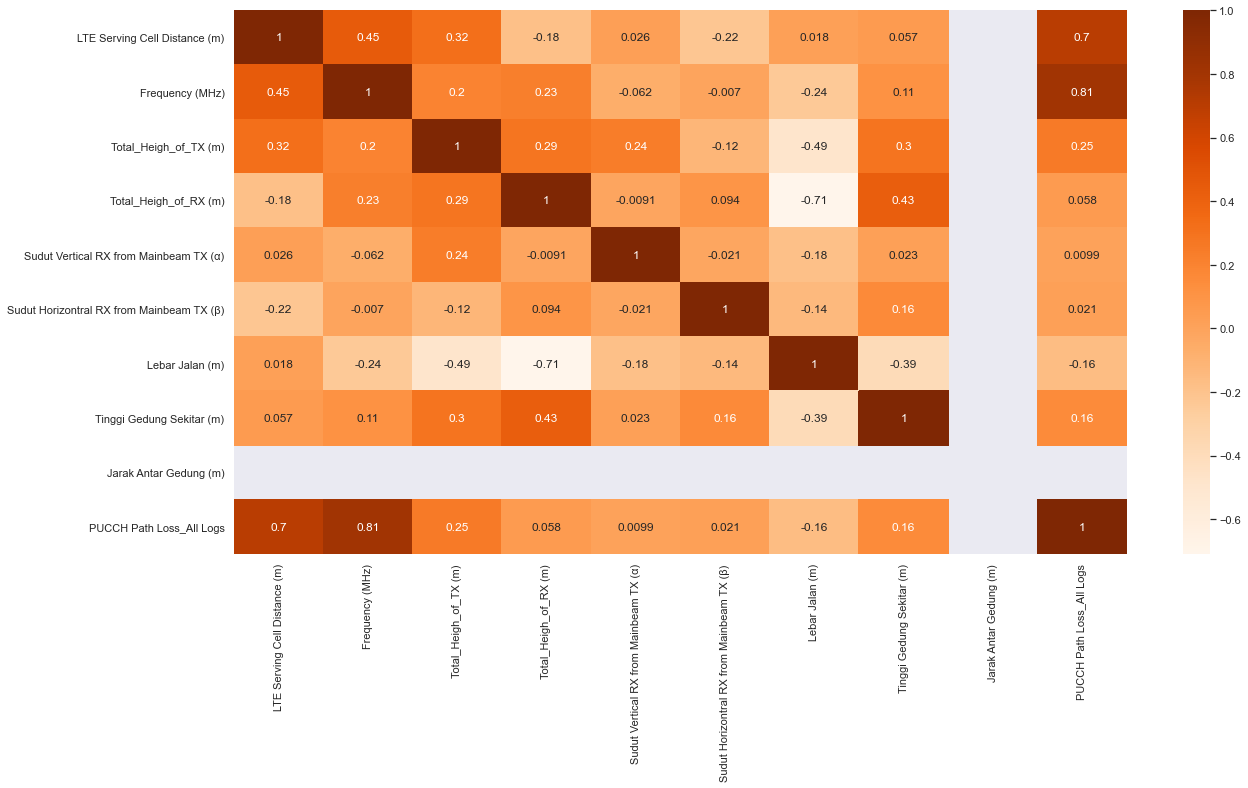

In [37]:
plt.figure(figsize=(20,10))
c=kor_5_no_outliers.corr()
heat_map = sns.heatmap(c, cmap="Oranges", annot=True)
c
figure = heat_map.get_figure()
figure.savefig('heatmap_figure.png', dpi=400)

In [38]:
kor_5_new = kor_5_no_outliers.drop(['Jarak Antar Gedung (m)'], axis=1)
kor_5_new

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100
...,...,...,...,...,...,...,...,...,...
1804,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,104
1805,526.05,2100,43.0,18.1640,1.296945,7.982779,26.83,10,128
1806,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,104
1807,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,108


### Penggunaan di Frekuensi 1800 MHz Random Forest

In [39]:
kor_5_new_1800 = kor_5_new[kor_5_new['Frequency (MHz)'] != 2100]

In [40]:
kor_5_new_1800 = kor_5_new_1800.reset_index(drop=True)
kor_5_new_1800

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100
...,...,...,...,...,...,...,...,...,...
1051,543.87,1800,43.0,18.1640,1.385386,9.036243,26.83,10,106
1052,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,104
1053,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,104
1054,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,108


In [41]:
x = kor_5_new_1800.loc[:, 'LTE Serving Cell Distance (m)']
y = kor_5_new_1800.loc[:, 'PUCCH Path Loss_All Logs']

In [42]:
print(x)

0       254.96
1       247.69
2       240.83
3       234.67
4       228.02
         ...  
1051    543.87
1052    537.29
1053    530.09
1054    526.05
1055    520.04
Name: LTE Serving Cell Distance (m), Length: 1056, dtype: float64


In [43]:
print(y)

0        99
1       102
2       101
3       101
4       100
       ... 
1051    106
1052    104
1053    104
1054    108
1055    101
Name: PUCCH Path Loss_All Logs, Length: 1056, dtype: int64


In [44]:
print("Ukuran x", x.shape)
print("Ukuran y", y.shape)

Ukuran x (1056,)
Ukuran y (1056,)


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
print("x Train Shape :", x_train.shape)
print("x test Shape :", x_test.shape)
print("y train shape :", y_train.shape)
print("y test shape :", y_test.shape)

x Train Shape : (844,)
x test Shape : (212,)
y train shape : (844,)
y test shape : (212,)


In [48]:
print(y_test)

253    103
75     103
680    107
240    113
331     97
      ... 
267    110
926     96
811    108
624     98
384    100
Name: PUCCH Path Loss_All Logs, Length: 212, dtype: int64


In [49]:
x_train = x_train.values.reshape(-1, 1)
x_test  = x_test.values.reshape(-1, 1)

In [50]:
# Untuk MAE

def MAE(y_actual, y_predicted):
    mae = np.mean(abs(y_actual - y_predicted))
    return mae

In [51]:
# Untuk RMSE

def RMSE(y_actual, y_predicted):
    subtract = y_actual - y_predicted
    square = subtract ** 2
    mean = square.mean()
    rmse = np.sqrt(mean)
    return rmse

In [52]:
# Untuk MAPE

def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape

## Random Forest Regressor Tanpa Tuning Hyperparameter

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)

In [55]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [56]:
y_pred = regressor.predict(x_test)

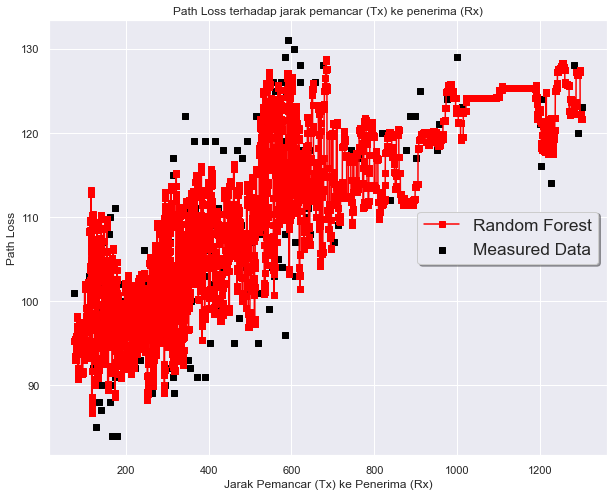

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
X_grid = np.arange(min(x_test), max(x_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test, y_test, color = 'black', marker="s", label="Measured Data")
plt.plot(X_grid, regressor.predict(X_grid), color = 'red', marker="s", label="Random Forest")
legend = plt.legend(loc='center right', shadow=True, fontsize='x-large')
plt.title('Path Loss terhadap jarak pemancar (Tx) ke penerima (Rx)')
plt.xlabel('Jarak Pemancar (Tx) ke Penerima (Rx)')
plt.ylabel('Path Loss')
plt.show()

In [58]:
RF_mae = MAE(y_test, y_pred)
print('MAE :', RF_mae, 'dB')

MAE : 7.109482423629831 dB


In [59]:
RF_rmse = RMSE(y_test, y_pred)
print('RMSE :', RF_rmse, 'dB')

RMSE : 8.927917108824815 dB


In [60]:
RF_mape = MAPE(y_test, y_pred)
print('MAPE', RF_mape, '%')

MAPE 6.770801367025846 %


### Random Forest Regressor Dengan Tuning Hyperparameter

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

model = RandomForestRegressor()
parameters = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

grid_search = RandomizedSearchCV(model, parameters)

grid_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                        

In [62]:
grid_search.best_params_

{'n_estimators': 1900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

In [61]:
rf_model_tuned = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=4, 
                                       max_features='sqrt', max_depth=25, bootstrap=True)
rf_model_tuned.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=300)

In [62]:
y_pred_tuned = rf_model_tuned.predict(x_test)

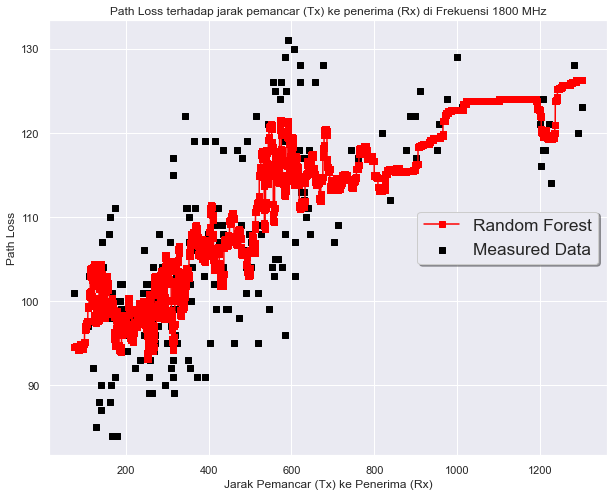

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
X_grid = np.arange(min(x_test), max(x_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test, y_test, color = 'black', marker="s", label="Measured Data")
plt.plot(X_grid, rf_model_tuned.predict(X_grid), color = 'red', marker="s", label="Random Forest")
legend = plt.legend(loc='center right', shadow=True, fontsize='x-large')
plt.title('Path Loss terhadap jarak pemancar (Tx) ke penerima (Rx) di Frekuensi 1800 MHz')
plt.xlabel('Jarak Pemancar (Tx) ke Penerima (Rx)')
plt.ylabel('Path Loss')
plt.show()

In [64]:
RF_mae_tuned = MAE(y_test, y_pred_tuned)
print('MAE :', RF_mae_tuned, 'dB')

MAE : 6.05047596543476 dB


In [65]:
RF_rmse_tuned = RMSE(y_test, y_pred_tuned)
print('RMSE :', RF_rmse_tuned, 'dB')

RMSE : 7.855988151018997 dB


In [66]:
RF_mape_tuned = MAPE(y_test, y_pred_tuned)
print('MAPE', RF_mape_tuned, '%')

MAPE 5.779961046438362 %


In [80]:
def PlotFeatureImportances(model, feature_names):
    feature_importances = (pd
                           .DataFrame(
                               {'feature': feature_names,
                                'importance': model
                                .feature_importances_}))

    feature_importances = (feature_importances
                           .sort_values(by="importance",
                                        ascending=False))
    plt.figure(figsize=(20, 10))
    plt.rcParams['font.size'] = 20
    sns.set(font_scale=1.5, style="whitegrid")

    # set color
    labels = np.array(feature_importances.feature)
    values = np.array(feature_importances.importance) 
    colors = ["#808080" if (y < max(values))
              else "#971539" for y in values]

    # set the plot
    ax = sns.barplot(x="importance", 
                     y="feature", 
                     data=feature_importances, 
                     palette = colors)

    # set title and save plot
    plt.title("Feature Importances", size = 20)
    # plt.savefig("FeatureImportances.png")

In [103]:
x_features = kor_5_new_1800.loc[:, 'LTE Serving Cell Distance (m)']

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size=0.2, random_state=0)

In [105]:
x_train = x_train.values.reshape(-1, 1)
x_test  = x_test.values.reshape(-1, 1)

In [106]:
RFR = RandomForestRegressor(n_estimators=1000, random_state=0)

In [107]:
RFR.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [108]:
PlotFeatureImportances(RFR, x_test.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [109]:
feature_importances = (pd
                       .DataFrame(
                           {'feature': x_test.columns,
                            'importance': RFR
                            .feature_importances_}))

feature_importances = (feature_importances
                       .sort_values(by="importance", 
                                    ascending=False))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [63]:
feature_importances

,feature,importance
1,Frequency (MHz),0.666919
0,LTE Serving Cell Distance (m),0.196522
4,Sudut Vertical RX from Mainbeam TX (α),0.037288
5,Sudut Horizontral RX from Mainbeam TX (β),0.030529
3,Total_Heigh_of_RX (m),0.028041
6,Lebar Jalan (m),0.019020
2,Total_Heigh_of_TX (m),0.011792
7,Tinggi Gedung Sekitar (m),0.007172
8,Jarak Antar Gedung (m),0.002718


### Penggunaan di Frekuensi 2100 MHz Random Forest

In [67]:
kor_5_new_2100 = kor_5_new[kor_5_new['Frequency (MHz)'] != 1800]

In [68]:
kor_5_new_2100 = kor_5_new_2100.reset_index(drop=True)
kor_5_new_2100

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs
0,1210.01,2100,63.5,11.7495,2.551029,10.623086,16.83,15,147
1,1198.43,2100,63.5,11.7495,2.527395,10.829121,16.83,15,140
2,1186.66,2100,63.5,12.3915,2.533841,11.039126,16.83,15,145
3,1168.15,2100,63.5,13.0165,2.525410,11.391624,16.83,15,148
4,1160.09,2100,63.5,13.2175,2.518147,11.551928,16.83,15,146
...,...,...,...,...,...,...,...,...,...
748,565.24,2100,43.0,18.1640,1.484107,10.113473,26.83,10,131
749,554.15,2100,43.0,18.1640,1.433824,9.522944,26.83,10,131
750,535.90,2100,43.0,18.1640,1.346556,8.554454,26.83,10,128
751,528.06,2100,43.0,18.1640,1.307219,8.172553,26.83,10,124


In [69]:
x_new = kor_5_new_2100.loc[:, 'LTE Serving Cell Distance (m)']
y_new = kor_5_new_2100.loc[:, 'PUCCH Path Loss_All Logs']

In [70]:
print("Ukuran x", x_new.shape)
print("Ukuran y", y_new.shape)

Ukuran x (753,)
Ukuran y (753,)


In [71]:
x_new  = x_new.values.reshape(-1, 1)

In [72]:
print("Ukuran x", x_new.shape)

Ukuran x (753, 1)


In [73]:
RF = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=4, 
                                       max_features='sqrt', max_depth=25, bootstrap=True)
RF.fit(x_new, y_new)

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=300)

In [74]:
y_pred_RF_new = RF.predict(x_new)

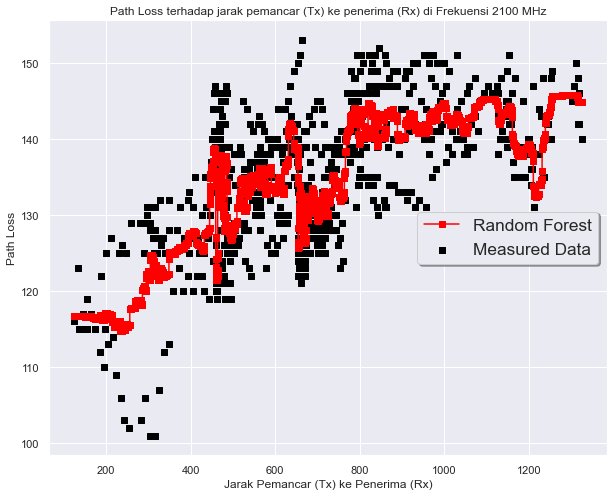

In [75]:
fig, ax = plt.subplots(figsize=(10,8))
X_grid = np.arange(min(x_new), max(x_new), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_new, y_new, color = 'black', marker="s", label="Measured Data")
plt.plot(X_grid, RF.predict(X_grid), color = 'red', marker="s", label="Random Forest")
legend = plt.legend(loc='center right', shadow=True, fontsize='x-large')
plt.title('Path Loss terhadap jarak pemancar (Tx) ke penerima (Rx) di Frekuensi 2100 MHz')
plt.xlabel('Jarak Pemancar (Tx) ke Penerima (Rx)')
plt.ylabel('Path Loss')
plt.show()

In [76]:
RF_mae_new = MAE(y_new, y_pred_RF_new)
print("MAE :",RF_mae_new, "dB")

MAE : 4.161780405046524 dB


In [77]:
RF_rmse_new = RMSE(y_new, y_pred_RF_new)
print("RMSE :",RF_rmse_new,"dB")

RMSE : 5.319990474165034 dB


In [78]:
RF_mape_new = MAPE(y_new, y_pred_RF_new)
print("MAPE :",RF_mape_new,"%")

MAPE : 3.130076798786654 %


## Model Cost - Hata

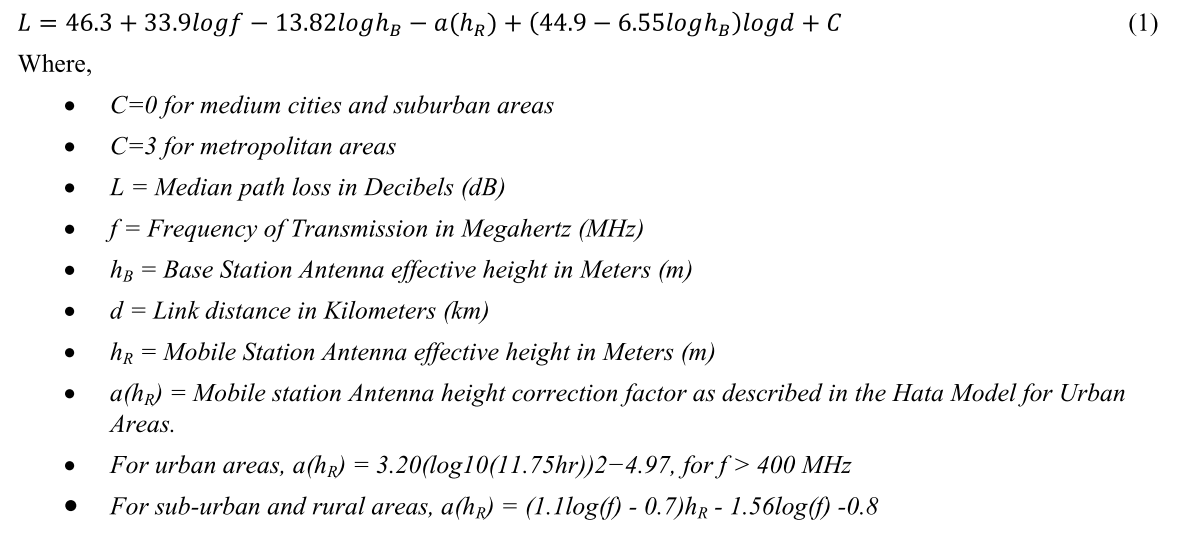

### Penggunaan Frekuensi 1800 MHz Cost - Hata

In [79]:
kor_5_new_1800

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100
...,...,...,...,...,...,...,...,...,...
1051,543.87,1800,43.0,18.1640,1.385386,9.036243,26.83,10,106
1052,537.29,1800,43.0,18.1640,1.353411,8.650419,26.83,10,104
1053,530.09,1800,43.0,18.1640,1.317516,8.267735,26.83,10,104
1054,526.05,1800,43.0,18.1640,1.296945,7.982779,26.83,10,108


In [80]:
kor_5_new_1800['Jarak Tx ke Rx (km)'] = kor_5_new_1800['LTE Serving Cell Distance (m)']/1000
kor_5_new_1800.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km)
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99,0.25496
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102,0.24769
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101,0.24083
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101,0.23467
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100,0.22802


In [81]:
# Tipe urban
kor_5_new_1800['C (Area Urban)'] = 3
kor_5_new_1800.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban)
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99,0.25496,3
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102,0.24769,3
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101,0.24083,3
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101,0.23467,3
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100,0.22802,3


In [82]:
# Mencari a(hm) f (frekuensi) >= 400 MHz
kor_5_new_1800['a(hm)'] = ((3.2*(np.log10((11.75*kor_5_new_1800['Total_Heigh_of_RX (m)'])))**2)-4.97)
kor_5_new_1800.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban),a(hm)
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99,0.25496,3,12.434477
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102,0.24769,3,12.434477
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101,0.24083,3,12.434477
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101,0.23467,3,12.596595
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100,0.22802,3,12.772671


In [83]:
# Menghitung path loss dengan menggunakan Model Cost - Hata
kor_5_new_1800['Model Cost - Hata'] = (((((46.3+(33.9*(np.log10(kor_5_new_1800['Frequency (MHz)']))))-(13.82*(np.log10(kor_5_new_1800['Total_Heigh_of_TX (m)']))))-kor_5_new_1800['a(hm)'])+((44.9-(6.55*(np.log10(kor_5_new_1800['Total_Heigh_of_TX (m)']))))*np.log10(kor_5_new_1800['Jarak Tx ke Rx (km)'])))+kor_5_new_1800['C (Area Urban)'])
kor_5_new_1800.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban),a(hm),Model Cost - Hata
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99,0.25496,3,12.434477,104.416406
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102,0.24769,3,12.434477,103.986136
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101,0.24083,3,12.434477,103.568389
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101,0.23467,3,12.596595,103.020883
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100,0.22802,3,12.772671,102.417241


In [84]:
# Mencari Nilai Eror Absolut
#kor_5_new_1800['Nilai Eror Absolut'] = np.abs(kor_5_new_1800['PUCCH Path Loss_All Logs']-kor_5_new_1800['Model Cost - Hata'])

In [85]:
# Mencari Nilai Eror Kuadrat
#kor_5_new_1800['Nilai Eror Kuadrat'] = (kor_5_new_1800['PUCCH Path Loss_All Logs'] - kor_5_new_1800['Model Cost - Hata'])**2

In [86]:
# Mencari Nilai Eror Persentase Absolut
#kor_5_new_1800['Nilai Eror Persentase Absolut'] = np.abs((kor_5_new_1800['PUCCH Path Loss_All Logs']-kor_5_new_1800['Model Cost - Hata'])/kor_5_new_1800['PUCCH Path Loss_All Logs'])

In [87]:
kor_5_new_1800.head()

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban),a(hm),Model Cost - Hata
0,254.96,1800,42.3,18.2855,2.380774,72.687845,16.83,15,99,0.25496,3,12.434477,104.416406
1,247.69,1800,42.3,18.2855,2.537738,72.456774,16.83,15,102,0.24769,3,12.434477,103.986136
2,240.83,1800,42.3,18.2855,2.694457,72.246838,16.83,15,101,0.24083,3,12.434477,103.568389
3,234.67,1800,42.3,18.7475,2.731261,72.024960,16.83,15,101,0.23467,3,12.596595,103.020883
4,228.02,1800,42.3,19.2600,2.769798,71.790099,16.83,15,100,0.22802,3,12.772671,102.417241


In [88]:
x_ch = kor_5_new_1800.loc[: , 'LTE Serving Cell Distance (m)']
y_ch = kor_5_new_1800.loc[:, 'Model Cost - Hata']

In [89]:
x_train_ch, x_test_ch, y_train_ch, y_test_ch = train_test_split(x_ch, y_ch, test_size=0.2, random_state=0)

In [90]:
print(x_train_ch.shape)
print(y_train_ch.shape)

(844,)
(844,)


In [91]:
print(y_test_ch)

253    105.704646
75      92.086394
680    120.629455
240    118.344302
331     92.315342
          ...    
267     98.460186
926    103.119398
811    124.764772
624    111.464646
384    110.266982
Name: Model Cost - Hata, Length: 212, dtype: float64


In [92]:
x_train_ch = x_train_ch.values.reshape(-1, 1)
x_test_ch  = x_test_ch.values.reshape(-1, 1)

In [93]:
print(x_train_ch.shape)
print(x_test_ch.shape)

(844, 1)
(212, 1)


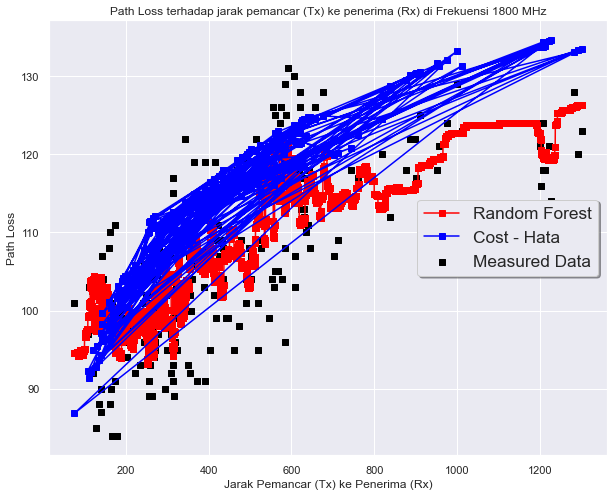

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
X_grid = np.arange(min(x_test), max(x_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test, y_test, color = 'black', marker="s", label="Measured Data")
plt.plot(X_grid, rf_model_tuned.predict(X_grid), color = 'red', marker="s", label="Random Forest")
plt.plot(x_test, y_test_ch, color='Blue', marker='s', label='Cost - Hata')
legend = plt.legend(loc='center right', shadow=True, fontsize='x-large')
plt.title('Path Loss terhadap jarak pemancar (Tx) ke penerima (Rx) di Frekuensi 1800 MHz')
plt.xlabel('Jarak Pemancar (Tx) ke Penerima (Rx)')
plt.ylabel('Path Loss')
plt.show()

In [95]:
# MAE
ch_mae = MAE(y_test, y_test_ch)
print("MAPE :",ch_mae,"%")

MAPE : 9.263413966951886 %


In [96]:
# RMSE
ch_rmse = RMSE(y_test, y_test_ch)
print("MAPE :",ch_rmse,"%")

MAPE : 11.014828305887804 %


In [97]:
# MAPE 
ch_mape = MAPE(y_test, y_test_ch)
print("MAPE :",ch_mape,"%")

MAPE : 9.06640898304202 %


### Penggunaan Frekuensi 2100 MHz Cost - Hata

In [98]:
kor_5_new_2100

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs
0,1210.01,2100,63.5,11.7495,2.551029,10.623086,16.83,15,147
1,1198.43,2100,63.5,11.7495,2.527395,10.829121,16.83,15,140
2,1186.66,2100,63.5,12.3915,2.533841,11.039126,16.83,15,145
3,1168.15,2100,63.5,13.0165,2.525410,11.391624,16.83,15,148
4,1160.09,2100,63.5,13.2175,2.518147,11.551928,16.83,15,146
...,...,...,...,...,...,...,...,...,...
748,565.24,2100,43.0,18.1640,1.484107,10.113473,26.83,10,131
749,554.15,2100,43.0,18.1640,1.433824,9.522944,26.83,10,131
750,535.90,2100,43.0,18.1640,1.346556,8.554454,26.83,10,128
751,528.06,2100,43.0,18.1640,1.307219,8.172553,26.83,10,124


In [99]:
kor_5_new_2100['Jarak Tx ke Rx (km)'] = kor_5_new_2100['LTE Serving Cell Distance (m)']/1000
kor_5_new_2100.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km)
0,1210.01,2100,63.5,11.7495,2.551029,10.623086,16.83,15,147,1.21001
1,1198.43,2100,63.5,11.7495,2.527395,10.829121,16.83,15,140,1.19843
2,1186.66,2100,63.5,12.3915,2.533841,11.039126,16.83,15,145,1.18666
3,1168.15,2100,63.5,13.0165,2.525410,11.391624,16.83,15,148,1.16815
4,1160.09,2100,63.5,13.2175,2.518147,11.551928,16.83,15,146,1.16009


In [100]:
# Tipe urban
kor_5_new_2100['C (Area Urban)'] = 3
kor_5_new_2100.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban)
0,1210.01,2100,63.5,11.7495,2.551029,10.623086,16.83,15,147,1.21001,3
1,1198.43,2100,63.5,11.7495,2.527395,10.829121,16.83,15,140,1.19843,3
2,1186.66,2100,63.5,12.3915,2.533841,11.039126,16.83,15,145,1.18666,3
3,1168.15,2100,63.5,13.0165,2.525410,11.391624,16.83,15,148,1.16815,3
4,1160.09,2100,63.5,13.2175,2.518147,11.551928,16.83,15,146,1.16009,3


In [101]:
# Mencari a(hm) f (frekuensi) >= 400 MHz
kor_5_new_2100['a(hm)'] = ((3.2*(np.log10((11.75*kor_5_new_2100['Total_Heigh_of_RX (m)'])))**2)-4.97)
kor_5_new_2100.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban),a(hm)
0,1210.01,2100,63.5,11.7495,2.551029,10.623086,16.83,15,147,1.21001,3,9.685504
1,1198.43,2100,63.5,11.7495,2.527395,10.829121,16.83,15,140,1.19843,3,9.685504
2,1186.66,2100,63.5,12.3915,2.533841,11.039126,16.83,15,145,1.18666,3,10.003660
3,1168.15,2100,63.5,13.0165,2.525410,11.391624,16.83,15,148,1.16815,3,10.300977
4,1160.09,2100,63.5,13.2175,2.518147,11.551928,16.83,15,146,1.16009,3,10.394164


In [102]:
# Menghitung path loss dengan menggunakan Model Cost - Hata
kor_5_new_2100['Model Cost - Hata'] = (((((46.3+(33.9*(np.log10(kor_5_new_2100['Frequency (MHz)']))))-(13.82*(np.log10(kor_5_new_2100['Total_Heigh_of_TX (m)']))))-kor_5_new_2100['a(hm)'])+((44.9-(6.55*(np.log10(kor_5_new_2100['Total_Heigh_of_TX (m)']))))*np.log10(kor_5_new_2100['Jarak Tx ke Rx (km)'])))+kor_5_new_2100['C (Area Urban)'])
kor_5_new_2100.head(5)

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban),a(hm),Model Cost - Hata
0,1210.01,2100,63.5,11.7495,2.551029,10.623086,16.83,15,147,1.21001,3,9.685504,130.063035
1,1198.43,2100,63.5,11.7495,2.527395,10.829121,16.83,15,140,1.19843,3,9.685504,129.924834
2,1186.66,2100,63.5,12.3915,2.533841,11.039126,16.83,15,145,1.18666,3,10.003660,129.464835
3,1168.15,2100,63.5,13.0165,2.525410,11.391624,16.83,15,148,1.16815,3,10.300977,128.941577
4,1160.09,2100,63.5,13.2175,2.518147,11.551928,16.83,15,146,1.16009,3,10.394164,128.748885


In [103]:
# Mencari Nilai Eror Absolut
#kor_5_new_2100['Nilai Eror Absolut'] = np.abs(kor_5_new_2100['PUCCH Path Loss_All Logs']-kor_5_new_2100['Model Cost - Hata'])

In [104]:
# Mencari Nilai Eror Kuadrat
#kor_5_new_2100['Nilai Eror Kuadrat'] = (kor_5_new_2100['PUCCH Path Loss_All Logs'] - kor_5_new_2100['Model Cost - Hata'])**2

In [105]:
# Mencari Nilai Eror Persentase Absolut
#kor_5_new_2100['Nilai Eror Persentase Absolut'] = np.abs((kor_5_new_2100['PUCCH Path Loss_All Logs']-kor_5_new_2100['Model Cost - Hata'])/kor_5_new_2100['PUCCH Path Loss_All Logs'])

In [106]:
kor_5_new_2100.head()

,LTE Serving Cell Distance (m),Frequency (MHz),Total_Heigh_of_TX (m),Total_Heigh_of_RX (m),Sudut Vertical RX from Mainbeam TX (α),Sudut Horizontral RX from Mainbeam TX (β),Lebar Jalan (m),Tinggi Gedung Sekitar (m),PUCCH Path Loss_All Logs,Jarak Tx ke Rx (km),C (Area Urban),a(hm),Model Cost - Hata
0,1210.01,2100,63.5,11.7495,2.551029,10.623086,16.83,15,147,1.21001,3,9.685504,130.063035
1,1198.43,2100,63.5,11.7495,2.527395,10.829121,16.83,15,140,1.19843,3,9.685504,129.924834
2,1186.66,2100,63.5,12.3915,2.533841,11.039126,16.83,15,145,1.18666,3,10.003660,129.464835
3,1168.15,2100,63.5,13.0165,2.525410,11.391624,16.83,15,148,1.16815,3,10.300977,128.941577
4,1160.09,2100,63.5,13.2175,2.518147,11.551928,16.83,15,146,1.16009,3,10.394164,128.748885


In [107]:
x_ch_new = kor_5_new_2100.loc[: , 'LTE Serving Cell Distance (m)']
y_ch_new = kor_5_new_2100.loc[:, 'Model Cost - Hata']

In [108]:
print(x_ch_new.shape)
print(y_ch_new.shape)

(753,)
(753,)


In [109]:
x_ch_new = x_ch_new.values.reshape(-1, 1)

In [110]:
x_ch_new.shape

(753, 1)

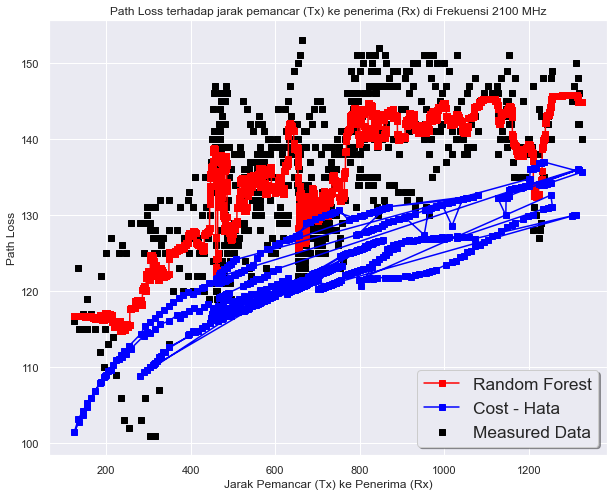

In [112]:
fig, ax = plt.subplots(figsize=(10,8))
X_grid = np.arange(min(x_new), max(x_new), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_new, y_new, color = 'black', marker="s", label="Measured Data")
plt.plot(X_grid, RF.predict(X_grid), color = 'red', marker="s", label="Random Forest")
plt.plot(x_new, y_ch_new, color='blue', marker='s', label='Cost - Hata')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title('Path Loss terhadap jarak pemancar (Tx) ke penerima (Rx) di Frekuensi 2100 MHz')
plt.xlabel('Jarak Pemancar (Tx) ke Penerima (Rx)')
plt.ylabel('Path Loss')
plt.show()

In [113]:
# MAE
ch_mae_new = MAE(y_new, y_ch_new)
print("MAPE :",ch_mae_new,"%")

MAPE : 12.531806840109384 %


In [114]:
# RMSE
ch_rmse_new = RMSE(y_new, y_ch_new)
print("MAPE :",ch_rmse_new,"%")

MAPE : 14.373152830118205 %


In [115]:
# MAPE 
ch_mape_new = MAPE(y_new, y_ch_new)
print("MAPE :",ch_mape_new,"%")

MAPE : 9.115719722193353 %
